In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

In [2]:
# load the Cifar-10 data set
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


In [3]:
# check the data set
print('x_train shape' , x_train.shape)
print('y_train shape' , y_train.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)


In [4]:
#Data Normalization and Augmentation
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True
                            )

In [6]:
# training and test split
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.3, random_state = 0)

In [7]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

##### Define Accuracy and loss graph and model fit function

In [8]:
def results(model):
  epoch = 100
  r = model.fit(datagen.flow(x_train , y_train , batch_size = 32), epochs = epoch  ,steps_per_epoch=len(x_train)/32, validation_data = (x_val , y_val) , verbose = 1)
  acc = model.evaluate(x_test , y_test)
  print("test set loss : " , acc[0])
  print("test set accuracy :", acc[1]*100)

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

c:\Users\cohenniv\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
1562/1562 [==============================] - 47s 18ms/step - loss: 1.7082 - accuracy: 0.3915 - val_loss: 1.4599 - val_accuracy: 0.4873
Epoch 2/100
1562/1562 [==============================] - 21s 13ms/step - loss: 1.3948 - accuracy: 0.5058 - val_loss: 1.4511 - val_accuracy: 0.5100
Epoch 3/100
1562/1562 [==============================] - 21s 13ms/step - loss: 1.2464 - accuracy: 0.5626 - val_loss: 1.0790 - val_accuracy: 0.6227
Epoch 4/100
1562/1562 [==============================] - 23s 15ms/step - loss: 1.1498 - accuracy: 0.6006 - val_loss: 1.0682 - val_accuracy: 0.6340
Epoch 5/100
1562/1562 [==============================] - 22s 14ms/step - loss: 1.0644 - accuracy: 0.6310 - val_loss: 0.9218 - val_accuracy: 0.6800
Epoch 6/100
1562/1562 [==============================] - 21s 14ms/step - loss: 1.0068 - accuracy: 0.6539 - val_loss: 0.9565 - val_accuracy: 0.6693
Epoch 7/100
1562/1562 [==============================] - 21s 13ms/step - loss: 0.9556 - accuracy: 0.6739 - val_loss: 0

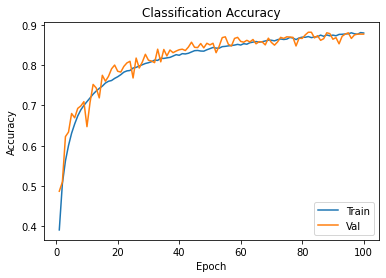

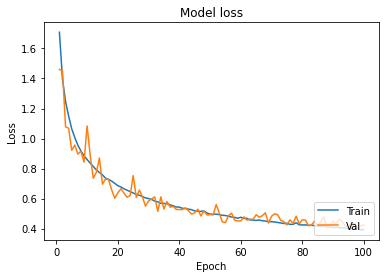

In [9]:
# define a CNN model:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
                    BatchNormalization(),
                    Conv2D(32, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')                    
])

opt =    tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

results(model)

In [10]:
# saving the model
model.save("model.hdf5")